# Convergence Comparison: Binomial vs Monte Carlo vs PDE

In this notebook, we compare how the estimated price of a vanilla European call option converges across three numerical methods:

- Binomial Tree Method  
- Monte Carlo Simulation  
- Finite Difference PDE (Crank-Nicolson)

We observe the convergence trends and computational efficiency of each.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import black_scholes_price
from pricing.monte_carlo import MonteCarloPricer
from pricing.pde import CrankNicolsonSolver
from pricing.binomial_tree import BinomialVanillaPricer

In [2]:
# Parameters

S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
is_call = True

bsm_ref = black_scholes_price(S0, K, T, r, sigma, option_type="call")
print(f"BSM Reference Price: {bsm_ref:.4f}")

BSM Reference Price: 10.4506


In [3]:
# Binomial Tree Convergence

binomial_steps = np.arange(10, 210, 10)
binomial_prices = []

for N in binomial_steps:
    pricer = BinomialVanillaPricer(S0, K, T, r, sigma, N, is_call=is_call)
    price = pricer.price()  # This is the correct method call
    binomial_prices.append(price)

In [4]:
# Monte Carlo Convergence

mc_paths = np.logspace(2, 5, 10, dtype=int)
mc_prices = []

for paths in mc_paths:
    pricer = MonteCarloPricer(S0, K, T, r, sigma, n_paths=paths, option_type='call')
    price = pricer.price_european_option()
    mc_prices.append(price)

In [5]:
# PDE Convergence

pde_steps = np.arange(10, 110, 10)
pde_prices = []

for M in pde_steps:
    solver = CrankNicolsonSolver(S_max=3*S0, K=K, T=T, r=r, sigma=sigma, M=M, N=M)
    price, grid = solver.solve()
    pde_prices.append(np.interp(S0, grid, price))

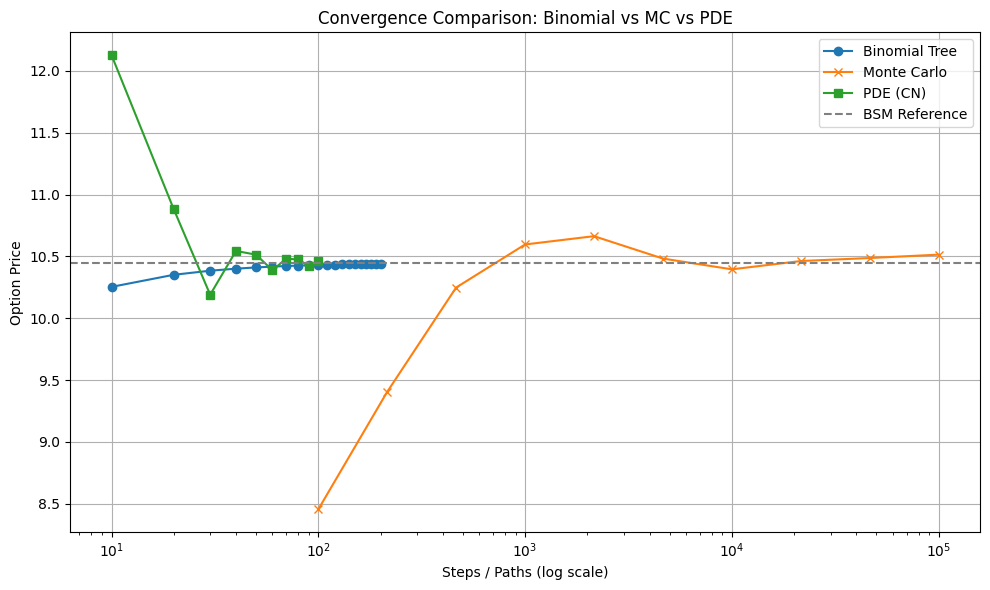

In [6]:
# Plotting All Methods

plt.figure(figsize=(10, 6))

plt.plot(binomial_steps, binomial_prices, label='Binomial Tree', marker='o')
plt.plot(mc_paths, mc_prices, label='Monte Carlo', marker='x')
plt.plot(pde_steps, pde_prices, label='PDE (CN)', marker='s')

plt.axhline(y=bsm_ref, color='gray', linestyle='--', label='BSM Reference')

plt.xscale('log')
plt.xlabel("Steps / Paths (log scale)")
plt.ylabel("Option Price")
plt.title("Convergence Comparison: Binomial vs MC vs PDE")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Observations

- **Binomial Tree** converges smoothly and quickly to the BSM price with increasing steps.
- **Monte Carlo** fluctuates more but improves with more paths.
- **PDE (Crank-Nicolson)** shows fast and stable convergence even with moderate grid sizes.
- Binomial and PDE methods typically converge faster and with lower variance than Monte Carlo.